# 2.2 Data representations for neural networks

In [7]:
import tensorflow as tf
import numpy as np
tf.test.is_gpu_available()

True

### 2.2.1 tensorflow tensor, numpy ndarray 차이

In [8]:
a = tf.constant([1,2,3,4])
a

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [9]:
b = np.array([1,2,3,4])

In [10]:
b

array([1, 2, 3, 4])

In [11]:
a.device

'/job:localhost/replica:0/task:0/device:GPU:0'

In [12]:
b.device # error

AttributeError: ignored

In [13]:
type(a.numpy())

numpy.ndarray

In [14]:
type(a)

tensorflow.python.framework.ops.EagerTensor

In [15]:
a + b

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([2, 4, 6, 8], dtype=int32)>

In [17]:
tf.convert_to_tensor(b, dtype=a.dtype)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

### 2.2.2 다양한 dimension의 tensor 생성

- 아래 코드를 참고하여 자유롭게 tensor를 생성해보세요.

In [18]:
a = np.array(1)
b = np.array([1,2])
c = np.array([[1,2],
              [1,2]])
d = np.array([[[1,2],
               [1,2]],
              [[1,2],
               [1,2]]])

In [19]:
print('scalar dim     ; ', a.ndim)
print('vector dim     ; ', b.ndim)
print('matrix dim     ; ', c.ndim)
print('3d tensor dim  ; ', d.ndim)

scalar dim     ;  0
vector dim     ;  1
matrix dim     ;  2
3d tensor dim  ;  3


In [20]:
print('scalar shape     ; ', a.shape)
print('vector shape     ; ', b.shape)
print('matrix shape     ; ', c.shape)
print('3d tensor shape  ; ', d.shape)

scalar shape     ;  ()
vector shape     ;  (2,)
matrix shape     ;  (2, 2)
3d tensor shape  ;  (2, 2, 2)


In [21]:
e = np.array([
              [[[1,2],
                [1,2]],
               [[1,2],
                [1,2]]],
              [[[1,2],
                [1,2]],
               [[1,2],
                [1,2]]]
              ])
print(e.ndim)
print(e.shape)

4
(2, 2, 2, 2)


## 2.2.3 mnist data 확인 및 slicing

- 아래 코드를 참고하여 자유롭게 tensor slicing을 진행해보세요.

In [23]:
%matplotlib inline
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
print(train_images.shape)
print(train_images.ndim)
print(train_images.dtype)

(60000, 28, 28)
3
uint8


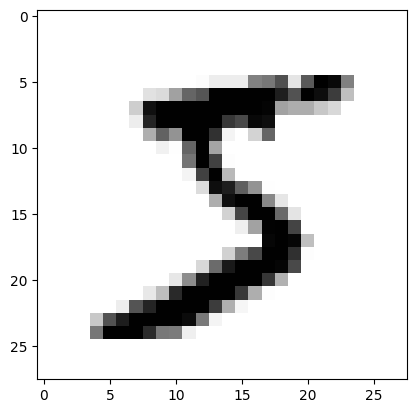

In [25]:
digit = train_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [26]:
digit.shape

(28, 28)

In [28]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [29]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [30]:
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


In [31]:
my_slice2 = train_images[:, 14:, 14:]
print(my_slice2.shape)

(60000, 14, 14)


In [32]:
my_slice3 = train_images[:, 7:-7, 7:-7]
print(my_slice3.shape)

(60000, 14, 14)


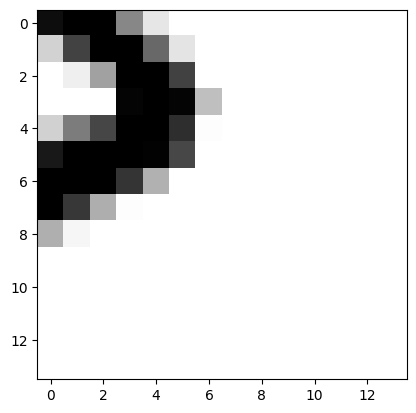

In [33]:
digit = my_slice2[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# 2.3. The gears of neural networks: tensor operations

In [34]:
import tensorflow as tf
import numpy as np
tf.test.is_gpu_available()

True

### 2.3.1 동일한 shape의 tensor 연산 --> element-wise operation

- 아래 코드를 참고하여 자유롭게 실행해보세요.

In [36]:
a = np.array([[1, 2, 3],[4, 5, 6]])
b = np.array([[2, 2, 2],[2, 2, 2]])
print(a, '\n', b)
print(a.shape, b.shape)

[[1 2 3]
 [4 5 6]] 
 [[2 2 2]
 [2 2 2]]
(2, 3) (2, 3)


In [37]:
print('더하기 ; \n',a+b)
print('빼기   ; \n', a-b)
print('곱하기 ; \n', a*b)
print('나누기 ; \n', a/b)
print('나머지 ; \n', a%b)
print('몫     ; \n', a//b)

더하기 ; 
 [[3 4 5]
 [6 7 8]]
빼기   ; 
 [[-1  0  1]
 [ 2  3  4]]
곱하기 ; 
 [[ 2  4  6]
 [ 8 10 12]]
나누기 ; 
 [[0.5 1.  1.5]
 [2.  2.5 3. ]]
나머지 ; 
 [[1 0 1]
 [0 1 0]]
몫     ; 
 [[0 1 1]
 [2 2 3]]


### 2.3.2 broadcasting

- 아래 코드를 참고하여 자유롭게 실행해보세요.

In [39]:
a = np.array([[1, 2, 3],[4, 5, 6]])
b = np.array([2, 4, 6])
print(a.shape, b.shape)

(2, 3) (3,)


In [40]:
np.maximum(a,b)

array([[2, 4, 6],
       [4, 5, 6]])

In [41]:
print('더하기 ; \n',a+b)
print('빼기   ; \n', a-b)
print('곱하기 ; \n', a*b)
print('나누기 ; \n', a/b)
print('나머지 ; \n', a%b)
print('몫     ; \n', a//b)

a = np.array([[1, 2, 3],[4, 5, 6]])
b = np.array([2, 4, 6])
print(a.shape, b.shape)

더하기 ; 
 [[ 3  6  9]
 [ 6  9 12]]
빼기   ; 
 [[-1 -2 -3]
 [ 2  1  0]]
곱하기 ; 
 [[ 2  8 18]
 [ 8 20 36]]
나누기 ; 
 [[0.5  0.5  0.5 ]
 [2.   1.25 1.  ]]
나머지 ; 
 [[1 2 3]
 [0 1 0]]
몫     ; 
 [[0 0 0]
 [2 1 1]]
(2, 3) (3,)


In [42]:
a = np.random.random((2,4,5,6,8))
b = np.random.random(8)

print(a.shape, b.shape)

(2, 4, 5, 6, 8) (8,)


In [43]:
(a+b).shape

(2, 4, 5, 6, 8)

### 2.3.3 tensor dot product

- 아래 코드를 참고하여 자유롭게 실행해보세요.

In [44]:
v = np.array([1,2,3])
v2 = np.array([11,12,13])
print(v.shape, v2.shape)

(3,) (3,)


In [45]:
np.dot(v, v2)

74

In [46]:
v = np.array([[1,2,3]])
v2 = np.array([[11,12,13]])
print(v.shape, v2.shape)

(1, 3) (1, 3)


In [47]:
np.dot(v,v2) # error

ValueError: ignored

In [49]:
v = np.array([[1,2,3]])
v2 = np.array([11,12,13])
print(v.shape, v2.shape)

(1, 3) (3,)


In [50]:
np.dot(v,v2)

array([74])

In [51]:
a = np.array([[1, 2, 3],[4, 5, 6]])
b = np.array([[2, 2, 2],[2, 2, 2]])
print('a ; \n {} \n b ; \n {}'.format(a,b))
print(a.shape, b.shape)

a ; 
 [[1 2 3]
 [4 5 6]] 
 b ; 
 [[2 2 2]
 [2 2 2]]
(2, 3) (2, 3)


In [52]:
np.dot(a, b)  # error

ValueError: ignored

In [53]:
print(np.transpose(a))
print('transpose shape ; ', np.transpose(a).shape)

[[1 4]
 [2 5]
 [3 6]]
transpose shape ;  (3, 2)


In [55]:
print(np.transpose(a).shape)
print(b.shape)
print(np.dot(np.transpose(a), b).shape)
print(np.dot(np.transpose(a), b))

(3, 2)
(2, 3)
(3, 3)
[[10 10 10]
 [14 14 14]
 [18 18 18]]


In [56]:
c = np.array([[[1,2,3],[4,5,6]], [[11,12,13],[14,15,16]]])
c.shape

(2, 2, 3)

In [57]:
np.dot(c,np.transpose(a)).shape

(2, 2, 2)

### 2.3.4 tensor reshaping

- 아래 코드를 참고하여 자유롭게 실행해보세요.

a.reshape / np.transpose

2.3.4.1 array.reshape

In [59]:
v = np.array([1,2,3])
v2 = np.array([11,12,13])
print(v.shape, v2.shape)

(3,) (3,)


In [60]:
print(v.reshape(1,3))
print(v.reshape(1,3).shape)

[[1 2 3]]
(1, 3)


In [61]:
print(v.reshape(1,1,3))
print(v.reshape(1,1,3).shape)

[[[1 2 3]]]
(1, 1, 3)


In [62]:
print(v.reshape(1,1,3,1))
print(v.reshape(1,1,3,1).shape)

[[[[1]
   [2]
   [3]]]]
(1, 1, 3, 1)


In [63]:
print(v.reshape(3,1))
print(v.reshape(3,1).shape)

[[1]
 [2]
 [3]]
(3, 1)


In [64]:
print(v.reshape(3,1,1))
print(v.reshape(3,1,1).shape)

[[[1]]

 [[2]]

 [[3]]]
(3, 1, 1)


In [65]:
a = np.array([[1, 2, 3],[4, 5, 6]])
b = np.array([[2, 2, 2],[2, 2, 2]])
print('a ; \n {} \n b ; \n {}'.format(a,b))
print(a.shape, b.shape)

a ; 
 [[1 2 3]
 [4 5 6]] 
 b ; 
 [[2 2 2]
 [2 2 2]]
(2, 3) (2, 3)


In [66]:
print(a.reshape(3,2))
print(a.reshape(3,2).shape)

[[1 2]
 [3 4]
 [5 6]]
(3, 2)


In [67]:
print(a.reshape(3,2,1))
print(a.reshape(3,2,1).shape)

[[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]]
(3, 2, 1)


In [68]:
c = np.array([[[1,2,3],[4,5,6]], [[11,12,13],[14,15,16]]])
c.shape

(2, 2, 3)

In [69]:
print(c.reshape(3,2,2))
print(c.reshape(3,2,2).shape)

[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [11 12]]

 [[13 14]
  [15 16]]]
(3, 2, 2)


In [70]:
print(c.reshape(6,2,1))
print(c.reshape(6,2,1).shape)

[[[ 1]
  [ 2]]

 [[ 3]
  [ 4]]

 [[ 5]
  [ 6]]

 [[11]
  [12]]

 [[13]
  [14]]

 [[15]
  [16]]]
(6, 2, 1)


2.3.4.2 np.transpose

In [ ]:
v = np.array([1,2,3])
print(v.shape)
print(np.transpose(v))
print(np.transpose(v).shape)

(3,)
[1 2 3]
(3,)


In [ ]:
a = np.array([[1, 2, 3],[4, 5, 6]])
print(a)
print(a.shape)
print(np.transpose(a))
print(np.transpose(a).shape)

[[1 2 3]
 [4 5 6]]
(2, 3)
[[1 4]
 [2 5]
 [3 6]]
(3, 2)


In [ ]:
c = np.array([[[1,2,3],[4,5,6]], [[11,12,13],[14,15,16]]])

print(c.shape)
print(np.transpose(c))
print(np.transpose(c).shape)

(2, 2, 3)
[[[ 1 11]
  [ 4 14]]

 [[ 2 12]
  [ 5 15]]

 [[ 3 13]
  [ 6 16]]]
(3, 2, 2)


In [ ]:
help(np.transpose)

Help on function transpose in module numpy:

transpose(a, axes=None)
    Reverse or permute the axes of an array; returns the modified array.
    
    For an array a with two axes, transpose(a) gives the matrix transpose.
    
    Refer to `numpy.ndarray.transpose` for full documentation.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axes : tuple or list of ints, optional
        If specified, it must be a tuple or list which contains a permutation of
        [0,1,..,N-1] where N is the number of axes of a.  The i'th axis of the
        returned array will correspond to the axis numbered ``axes[i]`` of the
        input.  If not specified, defaults to ``range(a.ndim)[::-1]``, which
        reverses the order of the axes.
    
    Returns
    -------
    p : ndarray
        `a` with its axes permuted.  A view is returned whenever
        possible.
    
    See Also
    --------
    ndarray.transpose : Equivalent method
    moveaxis
    argsort
    
    N